In [3]:
import requests
import os
from multiprocessing import Pool

import pandas as pd
import datetime
import numpy as np
import jieba

import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 中文

In [2]:
hd = {
    'sec-ch-ua': '"Google Chrome";v="95", "Chromium";v="95", ";Not A Brand";v="99"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': "Windows",
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'
}

# 将日期分为年月日
datedg = '20200122'
year = datedg[:4]
month = datedg[4:6]
day = datedg[6:8]
print(f"Crawling Renmingribao news for date {datedg}")
mkdir('rmrb/')
# 下载2020年1月22日的新闻，前20页pdf文件
for page in range(1, 21):
    link_news = f'http://paper.people.com.cn/rmrb/page/{year}-{month}/{day}/{page:02}/rmrb{year}{month}{day}{page:02}.pdf'
    res = requests.get(link_news, headers=hd)
    pdf_dir = f'rmrb/{year}-{month}-{day}'
    pdf_url = f'{pdf_dir}/{page:02}.pdf'
    if res.status_code == 200:
        data = res.content
        mkdir(pdf_dir)
        with open(pdf_url, 'wb') as doc_f:
            doc_f.write(data)
        doc_f.close()
        print(page, 'Done')


In [105]:
##定义提取pdf中文本信息的方法

import sys
import os
from io import StringIO
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfdevice import PDFDevice
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
content = list()
laparams = LAParams()
laparams.word_margin = 0.2
rsrcmgr = PDFResourceManager(caching=True)

def pdf_parser(file_path):
    output = StringIO()
    device = TextConverter(rsrcmgr, output, laparams=laparams)
    with open(file_path, 'rb') as fp:
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        for page in PDFPage.get_pages(fp, caching=True, check_extractable=True):
            interpreter.process_page(page)
    return output.getvalue()

In [106]:
pdf_file_dir = 'rmrb/2020-01-22/'
n_cores = 6
with Pool(n_cores) as pool:
    contents = pool.map(pdf_parser, [os.path.join(pdf_file_dir, str(file).zfill(2) + '.pdf') for file in range(1, 6)])

In [107]:
contents[0]

'2020年1月22\n\n星期三\n\n己亥年十二月廿八\n\n人民日报社出版\n\n国内统一连续出版物号\n\nCN 11-0065\n\n代号1-1\n第26128期\n今日20版\n\n中缅共命运 胞波情谊长\n—记国家主席习近平访问缅甸25小时\n\n一月是缅甸首都内比都一年中最好的时节，阳光温煦，空气\n清爽，处处绿意葱茏。当地时间17日下午，国家主席习近平乘坐\n的专机在2架缅甸战机护航下，徐徐降落在内比都国际机场。\n此时，华夏大地正沉浸在春节将至的喜庆气氛中。刚刚庆祝\n过独立节的缅甸人民，更以节日般的盛情欢迎中国贵宾的到来。\n\n缅甸第一副总统敏瑞率多名内阁部长到机场迎接。\n红色的长毯连着鼓乐和笑脸。\n机场内，当地艺术家身穿华美的民族服装，跳起欢快的舞\n蹈。朝气蓬勃的少年儿童挥动着中缅两国国旗，欢呼着“中缅\n友谊万岁！”“习主席身体健康！”\n\n浓浓的情意溢满大街与小巷。\n“热烈欢迎中国国家主席习近平访问缅甸”“中缅胞波友\n谊万古长青”“中缅友好合作不断发展”……从机场到习近平\n主席下榻的酒店，红色巨幅标语一路绵延。“中国领导人来访\n将推动缅甸社会发展”“中缅友谊的高光时刻”……从主流媒\n体到社交网络，“中国”“中缅友谊”成为高频词。\n\n这是一次深化友谊之行——近25小时，接连12场正式活\n\n动，习近平主席同缅甸各界人士广泛接触交流。\n\n这是一次继往开来之旅——中缅建交70周年之际，中国\n\n国家主席时隔19年再度访缅，\n\n（下转第三版）\n\n人民网网址：http：// www. people. com. cn\n\n习近平春节前夕赴云南看望慰问各族干部群众\n\n向全国各族人民致以美好的新春祝福\n祝各族人民生活越来越好祝祖国欣欣向荣\n\n\U00100948\n\U00100948\n\U00100948\n\U00100948\n\U00100948\n\n1月19日至21日，中共中央总书记、国家主席、中央军委主席习近平来到云南，看望慰问各族干部群众，向全国人民致以\n新春祝福。这是 20日下午，习近平在昆明国际会展中心展厅外广场上，向云南群众、向全国各族人民、向港澳台同胞和海外\n侨胞致以新春祝福。\n\n\U00100948\n\U00100948\n\U00100948\n\U0010094

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.586 seconds.
Prefix dict has been built successfully.


Populating the interactive namespace from numpy and matplotlib


/home/TangServer/.local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['text', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


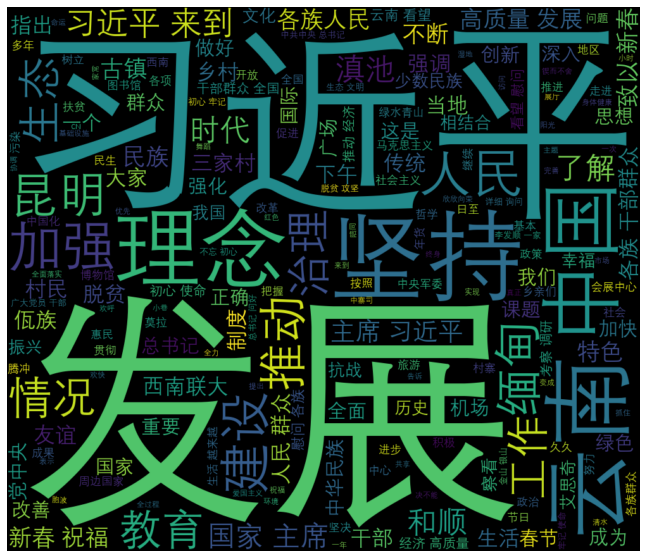

In [108]:
temp_text = contents[0].replace('\n','')
text = ' '.join(jieba.lcut(temp_text))
wordcloud = WordCloud(font_path="Deng.ttf", width=1000, height=860,).generate(text)


plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('fig_rmrb200122.png')

In [109]:
def read_dict(filepath):
    word_list = pd.read_csv(filepath, encoding='gbk', header=None)[0]
    words = [word.strip().replace('\n', '') for word in word_list.values]
    return words[2:]

n_sentiment_words = read_dict('负面情感词语（中文）.csv')
p_sentiment_words = read_dict('正面情感词语（中文）.csv')


In [110]:
def count_words(text, in_sentiment_words):
    result = np.zeros([len(in_sentiment_words)])
    words = jieba.lcut(text, HMM=True)
    for word in words:
        if word in in_sentiment_words:
            _index = in_sentiment_words.index(word)
            result[_index] += 1
    return result


def get_words(text, in_sentiment_words):
    result = []
    words = jieba.lcut(text, HMM=True)
    for word in words:
        if word in in_sentiment_words:
            result.append(word)
    return result


page_text = contents[0].replace('\n', '')
words_list = jieba.lcut(temp_text, HMM=True)
p_res = count_words(temp_text, p_sentiment_words)
n_res = count_words(temp_text, n_sentiment_words)
p_words = get_words(temp_text, p_sentiment_words)
n_words = get_words(temp_text, n_sentiment_words)

positive_rate = p_res.sum() / len(words_list)
negative_rate = n_res.sum() / len(words_list)

page_sentiment = positive_rate - negative_rate
print('页面文本的情感分值：', page_sentiment)



页面文本的情感分值： 0.09974984365228268


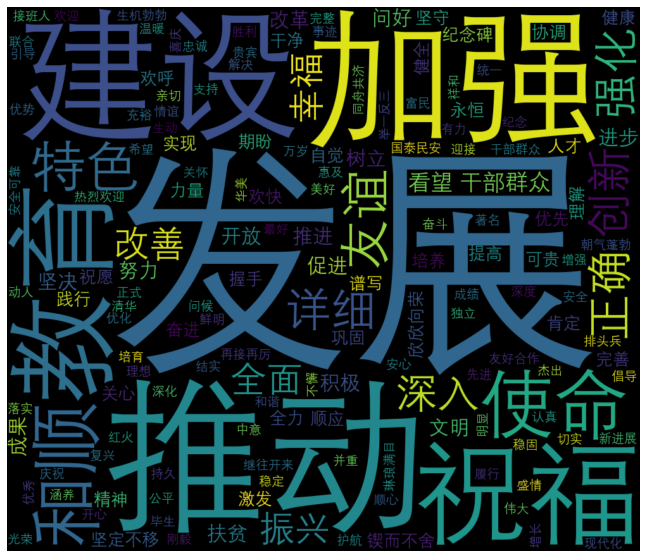

In [111]:
p_text = ' '.join(p_words)
wordcloud = WordCloud(font_path="Deng.ttf", width=1000, height=860, ).generate(p_text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

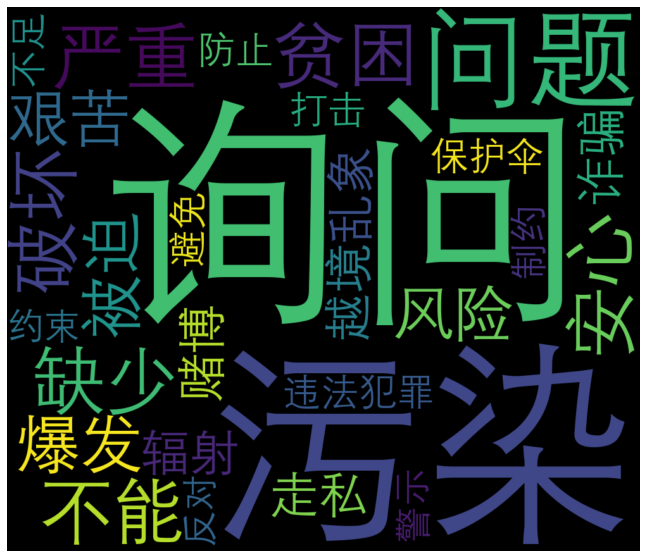

In [112]:
n_text = ' '.join(n_words)
wordcloud = WordCloud(font_path="Deng.ttf", width=1000, height=860,).generate(n_text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 美国

In [13]:
import gzip
import os
import requests

import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


In [2]:
# 下载master文件，公告索引，从2010年到2015年
file_dir = 'directory/'
if not os.path.exists(file_dir):
    os.makedirs(file_dir)

hd = {
    'sec-ch-ua': '"Google Chrome";v="95", "Chromium";v="95", ";Not A Brand";v="99"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': "Windows",
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'
}

for year in range(2010, 2015):
    for qtr in range(1, 5):
        ftp_url = f'https://www.sec.gov/Archives/edgar/full-index/{year}/QTR{qtr}/master.gz'
        file_path = file_dir + f'{year}QTR{qtr}.dat.gz'
        res = requests.get(ftp_url, headers=hd)
        if res.status_code == 200:
            data = res.content
            with open(file_path, 'wb') as f:
                f.write(data)
            f.close()
            print(f'Done with year {year} and quarter {qtr}')

Done with year 2010 and quarter 1
Done with year 2010 and quarter 2
Done with year 2010 and quarter 3
Done with year 2010 and quarter 4
Done with year 2011 and quarter 1
Done with year 2011 and quarter 2
Done with year 2011 and quarter 3
Done with year 2011 and quarter 4
Done with year 2012 and quarter 1
Done with year 2012 and quarter 2
Done with year 2012 and quarter 3
Done with year 2012 and quarter 4
Done with year 2013 and quarter 1
Done with year 2013 and quarter 2
Done with year 2013 and quarter 3
Done with year 2013 and quarter 4
Done with year 2014 and quarter 1
Done with year 2014 and quarter 2
Done with year 2014 and quarter 3
Done with year 2014 and quarter 4


In [3]:
# 创建文件夹
def path_check(path):
    folder = os.path.exists(path)
    if not folder:
        os.makedirs(path)
    

# 分行
def split_line(line):
    t_line = line.split('|')
    doc_address = t_line[4]
    cik = t_line[0]
    fewcik = '{:07d}'.format(int(cik))[0:4]
    doctype = t_line[2]
    return doc_address, cik, fewcik, doctype

In [113]:
# 根据索引对应到每一家公司的年报网页，将网页的内容爬取下来
index_f = open('indexfileEDGAR.csv', 'w')
for theme in range(2010, 2015):
    for qtr in range(1, 5):
        file_path = f'directory/{theme}QTR{qtr}.dat.gz'
        print(file_path)
        with gzip.open(file_path, 'rt') as f:
            line = f.readline()
            while line:
                if line.endswith('.txt\n'):
                    doc_address, cik, fewcik, doctype = split_line(line)
                    ftp_url = f'https://www.sec.gov/Archives/{doc_address}'
                    if doctype == '10-K' or doctype == '10K':
                        doc_number = doc_address.split('/')[3].replace('\n', '')
                        filing_dir = f'EDGAR/{fewcik}/{cik}'
                        filing_url = f'{filing_dir}/{doc_number}'
                        print("Save filing into " + filing_url)
                        path_check(filing_dir)
                        res = requests.get(ftp_url, headers=hd)
                        if res.status_code == 200:
                            data = res.content
                            with open(filing_url, 'wb') as doc_f:
                                doc_f.write(data)
                            doc_f.close()
                            for t_line in str(data, encoding="utf-8").split('\n'):
                                if t_line.startswith('<ACCEPTANCE-DATETIME>'):
                                    timestamp = t_line.split('>')[1]
                                    break
                            index_f.write(f'{cik},{doc_number},{doctype},{timestamp},{filing_url}')
                line = f.readline()
        f.close()
index_f.close()

directory/2010QTR1.dat.gz
Save filing into EDGAR/1000/1000180/0001000180-10-000008.txt
Save filing into EDGAR/1000/1000209/0001193125-10-055581.txt
Save filing into EDGAR/1000/1000228/0001000228-10-000006.txt
Save filing into EDGAR/1000/1000229/0001000229-10-000004.txt
Save filing into EDGAR/1000/1000230/0001193125-10-017031.txt
Save filing into EDGAR/1000/1000232/0001104659-10-017586.txt


KeyboardInterrupt: 

In [4]:
# 读取年报文件
f = open('EDGAR/1000/1000180/0001000180-10-000008.txt', mode='r')
html_text = f.readlines()
html_text = ''.join(html_text)
f.close()

In [5]:
# 对年报文件进行解析，获取其中文字内容
soup = BeautifulSoup(html_text, 'html.parser')
doc_text = soup.get_text()

In [6]:
# 对文字内容进行分词
token = nltk.word_tokenize(doc_text)

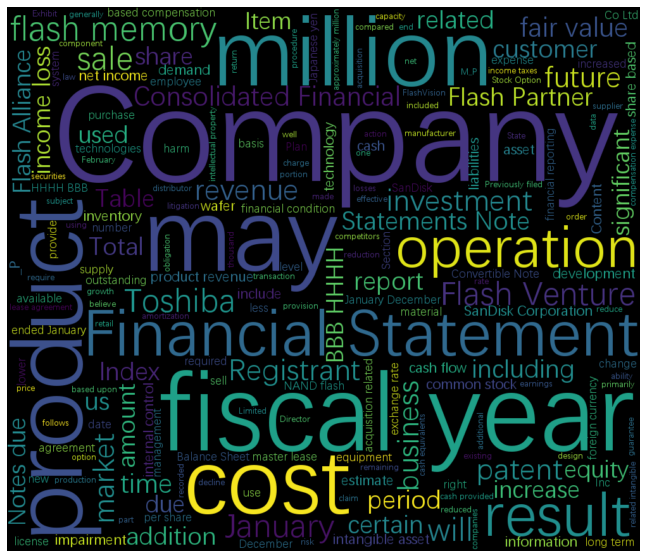

In [7]:
page_text = ' '.join(token)
wordcloud = WordCloud(font_path="Deng.ttf", width=1000, height=860, ).generate(page_text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
# 去除停用词以及标点符号
stop_words = stopwords.words('english')
f = open('PuncList.txt', mode='r')
punc_list = [x.replace('\n', '') for x in f.readlines()]
f.close()
token_filtered = [x for x in token if x not in punc_list or x not in stop_words]

In [9]:
# 读取 Harvard IV-4 以及 Loughran and McDonald 金融情感词典
sentiment_dict_lm = pd.read_csv('LM.csv')
p_dict_lm = sentiment_dict_lm[sentiment_dict_lm['Positive'] != 0]['Word'].to_list()
n_dict_lm = sentiment_dict_lm[sentiment_dict_lm['Negative'] != 0]['Word'].to_list()

sentiment_dict_hiv = pd.read_csv('HIV-4.csv')
p_dict_hiv = sentiment_dict_hiv[~sentiment_dict_hiv['Positiv'].isnull()]['Entry'].to_list()
n_dict_hiv = sentiment_dict_hiv[sentiment_dict_hiv['Negativ'].isnull()]['Entry'].to_list()

/home/TangServer/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (63,108,109,110,176) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
def count_words(words_list, in_sentiment_words):
    result = np.zeros([len(in_sentiment_words)])
    for word in words_list:
        if word.upper() in in_sentiment_words:
            _index = in_sentiment_words.index(word.upper())
            result[_index] += 1
    return result


def get_words(words_list, in_sentiment_words):
    result = []
    for word in words_list:
        if word.upper() in in_sentiment_words:
            result.append(word.lower())
    return result


In [14]:
p_res = count_words(token_filtered, p_dict_lm + p_dict_hiv)
n_res = count_words(token_filtered, n_dict_lm + n_dict_hiv)
p_words = get_words(token_filtered, p_dict_lm + p_dict_hiv)
n_words = get_words(token_filtered, n_dict_lm + n_dict_hiv)

positive_rate = p_res.sum() / len(token_filtered)
negative_rate = n_res.sum() / len(token_filtered)

page_sentiment = positive_rate - negative_rate
print('年报文本的情感分值：', page_sentiment)


年报文本的情感分值： -0.22183688855381614


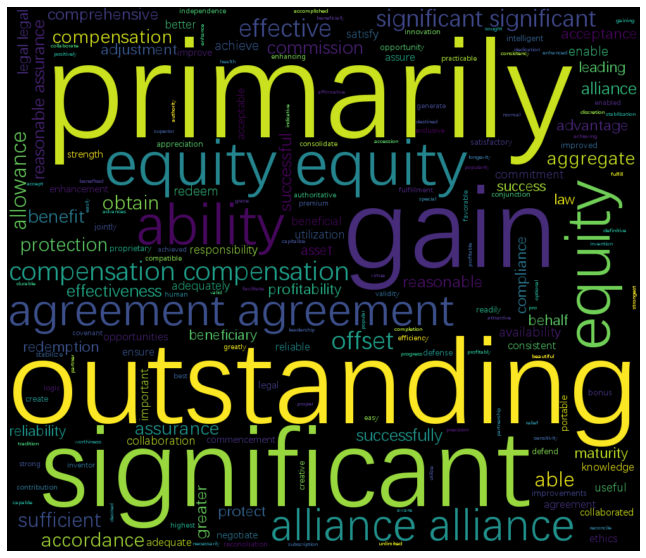

In [15]:
p_text = ' '.join(p_words)
wordcloud = WordCloud(font_path="Deng.ttf", width=1000, height=860, ).generate(p_text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


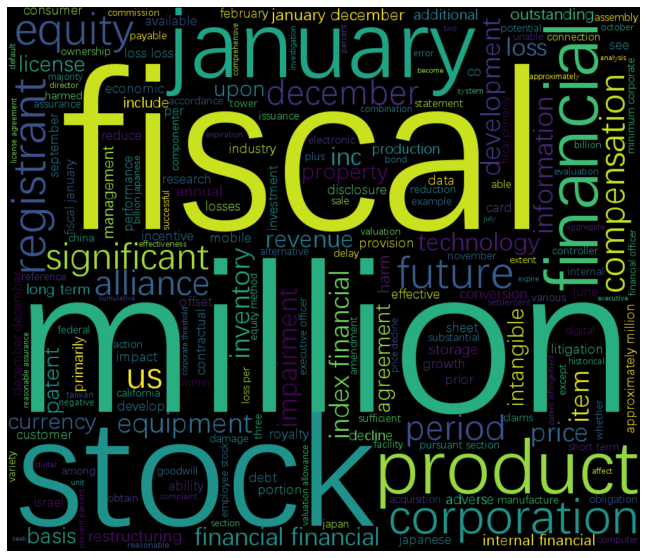

In [16]:
n_text = ' '.join(n_words)
wordcloud = WordCloud(font_path="Deng.ttf", width=1000, height=860, ).generate(n_text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()